In [1]:
from scipy import interpolate

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

There are two basic methods of interpolation: 
* (1) Fit one function to an entire dataset  
* (2) fit different parts of the dataset with several functions where the joints of each
function are joined smoothly(a spline interpolation, which
can be a very powerful tool when the functional form of data is complex)

# 1D interpolation

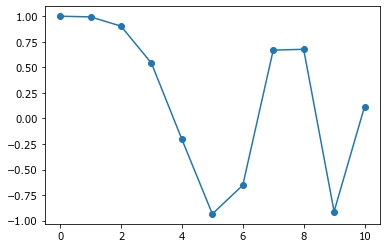

In [3]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
plt.plot(x, y, 'o-')

<code><b>scipy.interpolate.interp1d</b></code>

In [4]:
f1 = interpolate.interp1d(x, y, kind = 'linear')
f2 = interpolate.interp1d(x, y, kind = 'cubic')

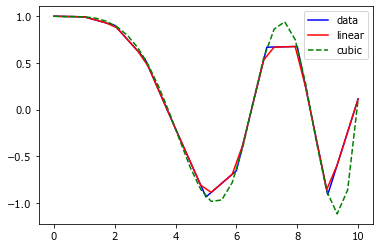

In [5]:
xnew = np.linspace(0, 10, 30)
plt.plot(x, y, 'b', xnew, f1(xnew), '-r', xnew, f2(xnew), 'g--')
plt.legend(['data', 'linear', 'cubic'])

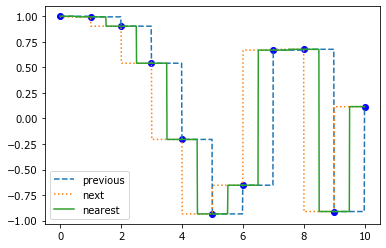

In [6]:
x = np.linspace(0, 10, num=11, endpoint=True)
xnew = np.linspace(0, 10, num=1001, endpoint=True)
y = np.cos(-x**2/9.0)
plt.plot(x, y, 'ob')
for kind, fmt  in zip(['previous', 'next', 'nearest'], ['--', ':', '-']):
    f = interpolate.interp1d(x, y, kind = kind)
    plt.plot(xnew, f(xnew), fmt, label = kind)
plt.legend()

In [7]:
np.mgrid[1:2:5j]

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

# Multivariate data interpolation

<code><b>scipy.interpolate.griddata</b></code> 

Suppose you have multidimensional data, for instance, for an underlying function f(x, y) you only know the values at points (x[i], y[i]) that do not form a regular grid.

Suppose we want to interpolate the 2-D function

In [8]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

but we only know its values at 1000 data points:

In [9]:
X = np.random.rand(100, 2)
Y = func(X[:,0], X[:,1])

let's use interpolation to calculate the value of <code>func</code> at an arbitrary point

In [10]:
xgrid, ygrid = np.mgrid[0:1:100j, 0:1:200j]

let's estimate the value of <code>func</code> at points on this grid

In [11]:
Y_nearest = interpolate.griddata(X, Y, (xgrid, ygrid), method = 'nearest')
Y_linear = interpolate.griddata(X, Y, (xgrid, ygrid), method = 'linear')
Y_cubic = interpolate.griddata(X, Y, (xgrid, ygrid), method = 'cubic')

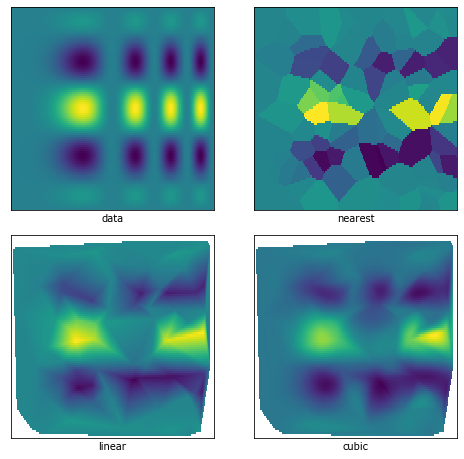

In [12]:
fig, axes = plt.subplots(2,2,subplot_kw = dict(xticks = [], yticks = []), figsize = (8,8), gridspec_kw = {'hspace':0.1})
for ax, img, method in zip(axes.flat, [func(xgrid, ygrid), Y_nearest, Y_linear, Y_cubic], ['data', 'nearest', 'linear','cubic']):
    ax.imshow(img, origin = 'lower', extent = (0,1,0,1))
    ax.set_xlabel(method)

# Spline Interpolation

In [13]:
from scipy.interpolate import UnivariateSpline, SmoothBivariateSpline

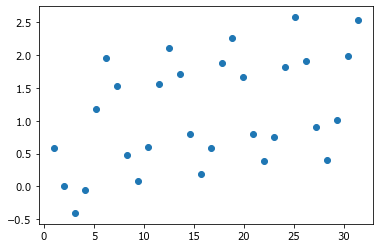

In [14]:
# Setting up fake data with artificial noise
sample = 30
x = np.linspace(1, 10 * np.pi, sample)
y = np.cos(x) + np.log10(x) + np.random.randn(sample) / 10
plt.scatter(x, y)

**`UnivariateSpline`**

```python
UnivariateSpline(
    x,
    y,
    w=None,
    bbox=[None, None],
    k=3,
    s=None,
    ext=0,
    check_finite=False,
)
Docstring:     
One-dimensional smoothing spline fit to a given set of data points.

Fits a spline y = spl(x) of degree `k` to the provided `x`, `y` data.  `s`
specifies the number of knots by specifying a smoothing condition.
```

In [17]:
np.info(UnivariateSpline)

 UnivariateSpline()

One-dimensional smoothing spline fit to a given set of data points.

Fits a spline y = spl(x) of degree `k` to the provided `x`, `y` data.  `s`
specifies the number of knots by specifying a smoothing condition.

Parameters
----------
x : (N,) array_like
    1-D array of independent input data. Must be increasing.
y : (N,) array_like
    1-D array of dependent input data, of the same length as `x`.
w : (N,) array_like, optional
    Weights for spline fitting.  Must be positive.  If None (default),
    weights are all equal.
bbox : (2,) array_like, optional
    2-sequence specifying the boundary of the approximation interval. If
    None (default), ``bbox=[x[0], x[-1]]``.
k : int, optional
    Degree of the smoothing spline.  Must be <= 5.
    Default is k=3, a cubic spline.
s : float or None, optional
    Positive smoothing factor used to choose the number of knots.  Number
    of knots will be increased until the smoothing condition is satisfied::

        sum((w[i

In [19]:
#interpolate noisy data using spline interpolation
func = UnivariateSpline(x, y, s = 1)
func

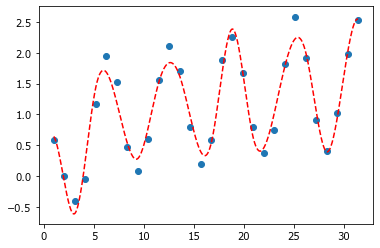

In [20]:
plt.scatter(x, y)

xint = np.linspace(x.min(), x.max(), 1000)
yint = func(xint)

plt.plot(xint, yint, '--r')

The option s is the smoothing factor, which should be used when fitting data with
noise. If instead s=0, then the interpolation will go through all points while ignoring
noise.

<hr>

**`SmoothBivariateSpline`**

```python
Init signature:
SmoothBivariateSpline(
    x,
    y,
    z,
    w=None,
    bbox=[None, None, None, None],
    kx=3,
    ky=3,
    s=None,
    eps=None,
)
Docstring:     
Smooth bivariate spline approximation.
```

In [24]:
np.info(SmoothBivariateSpline)

 SmoothBivariateSpline()

Smooth bivariate spline approximation.

Parameters
----------
x, y, z : array_like
    1-D sequences of data points (order is not important).
w : array_like, optional
    Positive 1-D sequence of weights, of same length as `x`, `y` and `z`.
bbox : array_like, optional
    Sequence of length 4 specifying the boundary of the rectangular
    approximation domain.  By default,
    ``bbox=[min(x,tx),max(x,tx), min(y,ty),max(y,ty)]``.
kx, ky : ints, optional
    Degrees of the bivariate spline. Default is 3.
s : float, optional
    Positive smoothing factor defined for estimation condition:
    ``sum((w[i]*(z[i]-s(x[i], y[i])))**2, axis=0) <= s``
    Default ``s=len(w)`` which should be a good value if ``1/w[i]`` is an
    estimate of the standard deviation of ``z[i]``.
eps : float, optional
    A threshold for determining the effective rank of an over-determined
    linear system of equations. `eps` should have a value between 0 and 1,
    the default is 1e-16.

Se

In [30]:
from scipy.interpolate import griddata

C:\Users\dell\Anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:1057: UserWarning: ier=15905
  warnings.warn(message)


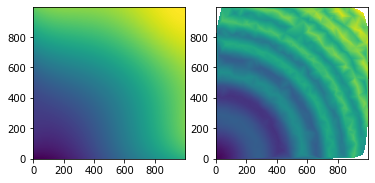

In [34]:
ripple = lambda x, y: np.sqrt(x**2 + y**2)+np.sin(x**2 + y**2)
# Generating sample that interpolation function will see
xy= np.random.rand(1000, 2)
x, y = xy[:,0], xy[:,1]
x_grid, y_grid = np.mgrid[0:1:1000j, 0:1:1000j]
sample = ripple(xy[:,0]*5, xy[:,1] * 5)

func = SmoothBivariateSpline(x * 5, y * 5,sample, s = 0.01, kx = 4, ky = 4)

fig, axes = plt.subplots(1,2)
axes[0].imshow(func(np.linspace(0,1,1000), np.linspace(0,1,1000)), origin = 'lower')

axes[1].imshow(griddata(xy, sample, (x_grid, y_grid)), origin = 'lower')